## Project Goal 

This analysis is done for user whose company deals with used cars and  will be running a marketing campaign .User would like to target only those  segments that have previously reported higher  number of sales depending on different features of cars provided in dataset  .

## Buisness Questions 

### 1.Doing the sales analysis .

### 2 .making a single  visualization that  can  be used to explore the topmost categories . Include:

1. What are the top three models sold between 2007 to 2015?
2. How much the car have been drove by the previous owner  in km_driven and its relation with the model year ?
3. Which selling method was used by different owners  , did they sold it individually or through a trader  ?

### 3 Producing different visualizations to analyse the selling price with differnt features of car .

In [1]:
#Import the  neccessary libraries 
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


<AxesSubplot:>

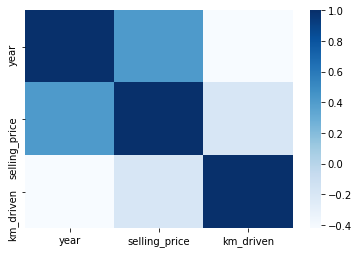

In [2]:

#Import the data 
filename = ("Used_car.csv")
df = pd.read_csv(filename)
#Getting info about the data 
df.info()
#To check correlation 
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

##Correlation :Dark shades represents positive correlation while lighter shades represents negative correlation.

<AxesSubplot:>

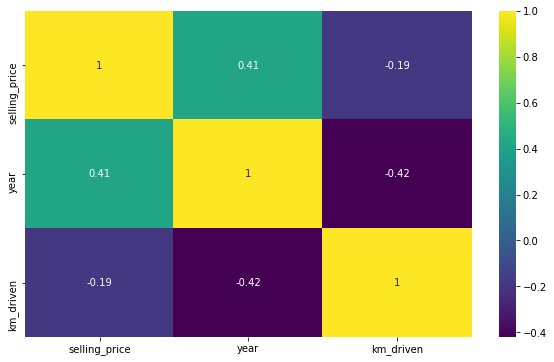

In [3]:
#selling_price correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'selling_price')['selling_price'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Here we can see that km_driven has positive correlation with selling_price and negative correlation with year and selling_price .

In [3]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [4]:
df.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [5]:
df.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

## Question 1 
Doing the sales analysis .

                  selling_price
seller_type                    
Dealer                717491953
Individual           1377095580
Trustmark Dealer       93325000


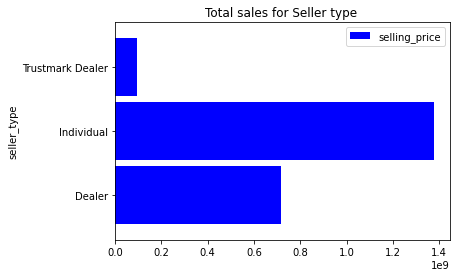

In [18]:
#total sales by each seller type 
sales_sellertype = df.groupby("seller_type").agg({"selling_price":"sum"})
print(sales_sellertype)

#plot total sales for each seller type 
sales_sellertype.plot(kind="barh",title=("Total sales for Seller type "),width=0.9,
color='b')
plt.show()

          selling_price
fuel                   
CNG            11086997
Diesel       1440559925
Electric         310000
LPG             3859999
Petrol        732095612


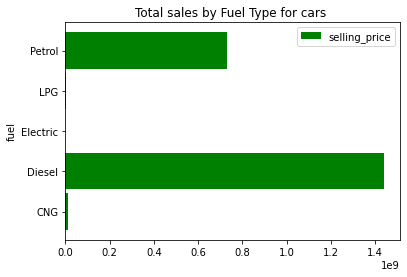

In [19]:
#total sales according to the fuel type of vehicle 
sales_fueltype = df.groupby("fuel").agg({"selling_price":"sum"})
print(sales_fueltype)
sales_fueltype.plot(kind="barh",title=("Total sales by Fuel Type for cars "),width=0.9,
color='g')
plt.show()

          selling_price
fuel                   
CNG            11086997
Diesel       1440559925
Electric         310000
LPG             3859999
Petrol        732095612


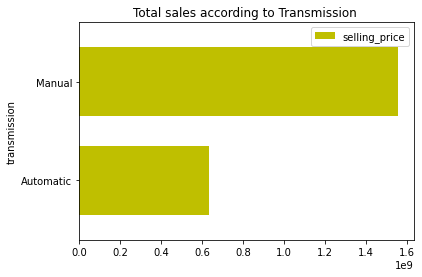

In [20]:
sales_transmissiontype = df.groupby("transmission").agg({"selling_price":"sum"})
print(sales_fueltype)
sales_transmissiontype.plot(kind="barh",title=("Total sales according to Transmission "),width=0.7,
color='y')
plt.show()

## Conclusion 1 
The above visualization shows total sales in accordance those different features . It lands to a conclusion about the sales matrix according to transmiission type , fuel type ,seller type for cars .
It gives the following results : 
The total sale of manual type was greater than automatic .
The total sale according to the fuel recorded most sale of diesel car and petrol was at second place and rest were CNG .

## Question 2 

making a single  visualization that  can  be used to explore the topmost categories . Include:

1. What are the top three models sold between 2007 to 2015?
2. How much the car have been drove by the previous owner  in km_driven and its relation with the model year ?
3. Which selling method was used by different owners  , did they sold it individually or through a trader  ?

In [16]:
# create top three category
grouping = df.groupby('name')[['year']].sum().reset_index()
top_three = grouping.sort_values(by = 'name', ascending = False).iloc[:3]
top_three_plot = px.bar(x = top_three.name, y = top_three.year)

# table for  year and km droven till the selling time 
grouping2 = df.groupby('year')[['km_driven']].sum().reset_index()
top_years = grouping2.sort_values(by = 'year', ascending = False)
top_years_plot = px.bar(x = top_years.year, y = top_years.km_driven)



# create a subplots
from plotly.subplots import make_subplots
figure = make_subplots(rows = 3, 
                       cols = 1, 
                       subplot_titles = ('Top three Category', 'km_driven by Year'),
                       vertical_spacing = 0.1
                      )

# add subplot to the main plot
figure.add_trace(top_three_plot['data'][0], row = 1, col = 1)
figure.add_trace(top_years_plot['data'][0], row = 2, col = 1)


# figure settings
figure.update_layout(height = 1200, 
                     width = 800, 
                     title_text = 'Top Categories for the year 2007-2015', 
                     title_font_color = '#00006D', 
                     title_font_family = 'Times New Roman',
                     title_font_size = 30,
                     title_pad_l = 100)

# updating yaxis of subplots
figure.update_yaxes(title_text = 'year', row = 1, col = 1, range = [2007, 2015])
figure.update_yaxes(title_text = 'km_driven', row = 3, col = 3 , range =[2007, 2015])


# updating xaxis of subplots
figure.update_xaxes(title_text = 'names', row = 3, col = 3)
figure.update_xaxes(title_text = 'year', row = 3, col = 3)


# display figure
figure.show()

## Summary Question 1 

From the year 2007 to 2015 the top three cars that were sold were all Volvo XC models in different variants  .

The most driven car was the model made in 2012 .

The company reported most sales by First Owner and the seller type was individual . Thus , it concludes that cilents dealing with company were mostly First Owners and directly contacted the company .

## 

<function matplotlib.pyplot.show(close=None, block=None)>

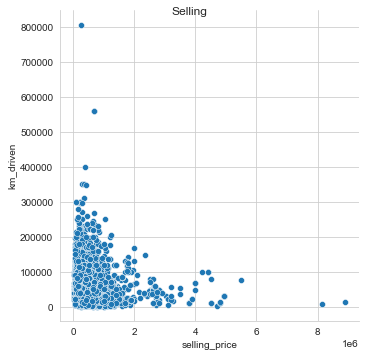

In [23]:
g = sns.relplot(x="selling_price", y = "km_driven" , data =df,kind="scatter")

g.fig.suptitle("Selling")

plt.show

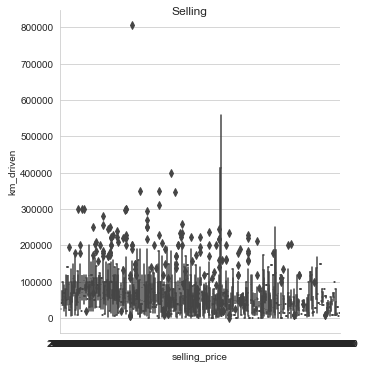

In [22]:
 sns.set_style("whitegrid")
g = sns.catplot(x="selling_price", y = "km_driven" , data =df,kind="box")

g.fig.suptitle("Selling")

plt.show()

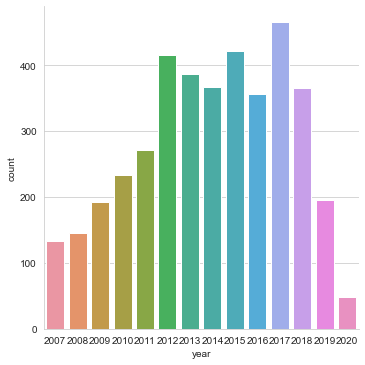

In [21]:
year_order = [2007 , 2008,2009 , 2010 , 2011 ,2012,2013, 2014 ,2015 ,2016, 2017 , 2018 ,2019, 2020]

sns.catplot(x="year" , data =df , kind="count" , order=year_order)

plt.show()

#### the company recorded most sale in the year 2017

Text(0, 0.5, 'years')

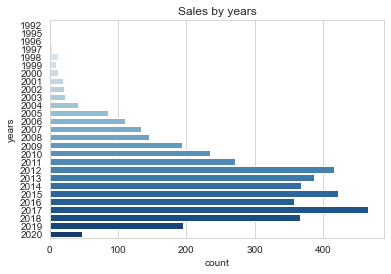

In [28]:
sns.countplot(y='year', data=df , palette='Blues')
plt.title("Sales by years")
plt.ylabel("years")


The below sns plots are classifed in 10 year timeline to analysze sales for the same .

(0.0, 10.0)

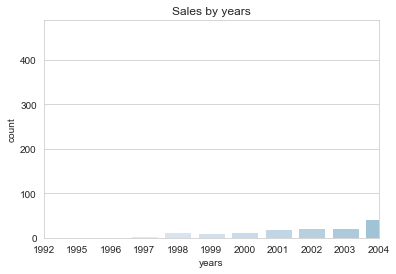

In [31]:
sns.countplot(x='year', data=df , palette='Blues')
plt.title("Sales by years")
plt.xlabel("years")
plt.xlim(0,10)

(10.0, 20.0)

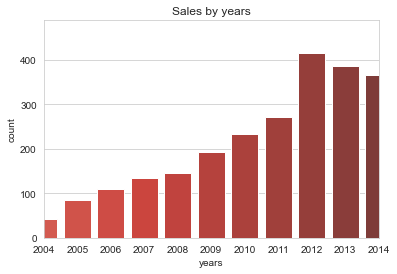

In [32]:
sns.countplot(x='year', data=df , palette='Reds_d')
plt.title("Sales by years")
plt.xlabel("years")
plt.xlim(10,20)

(20.0, 30.0)

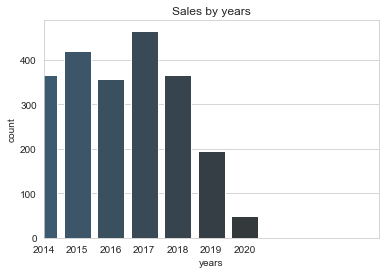

In [33]:
sns.countplot(x='year', data=df , palette='Blues_d')
plt.title("Sales by years")
plt.xlabel("years")
plt.xlim(20,30)

# Using Jointplot .
To visualize and analyze the relation  between selling_price and year on the same figure .
These includes different variations of visualization  for example , scatter plot ,regression plot etc  of the same variables to understand better about them .

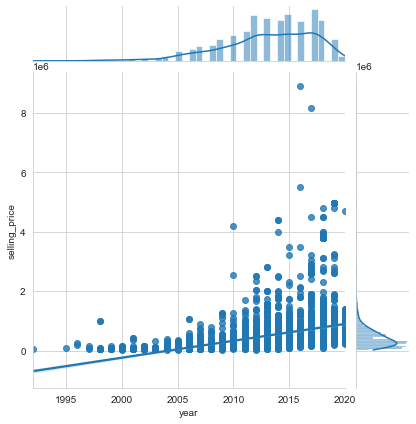

In [34]:
sns.jointplot(x="year",y="selling_price",kind='reg',data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:256: RankWarning:

Polyfit may be poorly conditioned



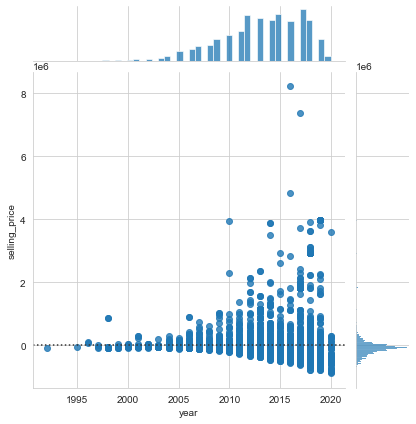

In [35]:
sns.jointplot(x="year",y="selling_price",kind='resid',data=df ,order =5)
plt.show()

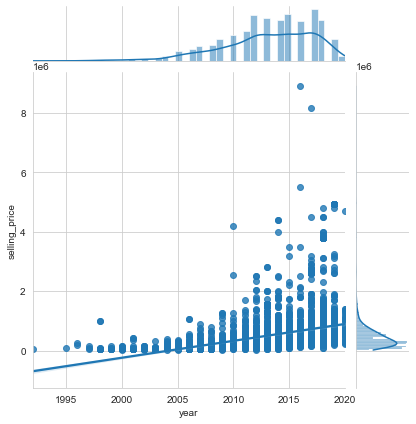

In [40]:
sns.jointplot(x="year",y="selling_price",kind='reg',data=df)
plt.show()

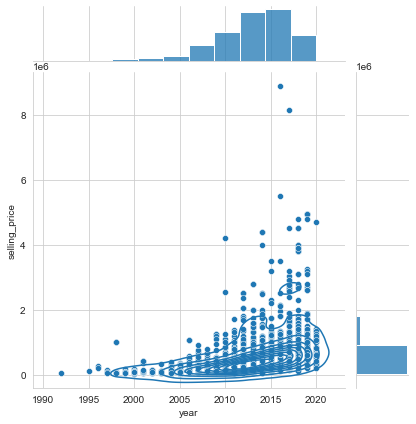

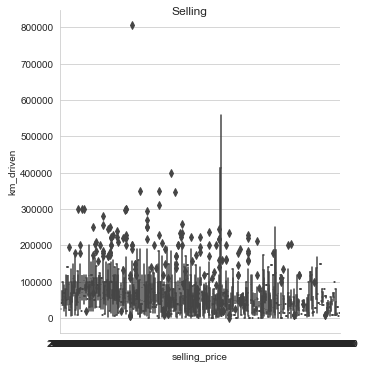

In [36]:
g= sns.jointplot(x="year", y ="selling_price", kind='scatter',data=df,marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()

g = sns.catplot(x="selling_price", y = "km_driven" , data =df,kind="box")

g.fig.suptitle("Selling")

plt.show()

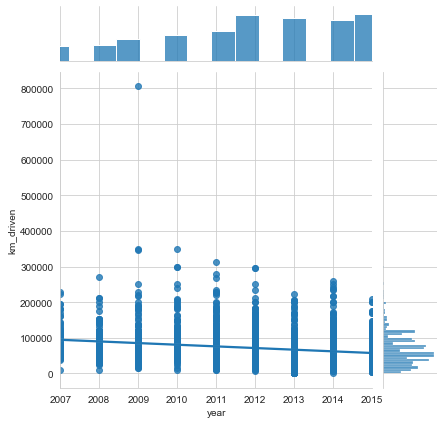

In [41]:
#building a JointGrid to compare year to Km_driven
sns.set_style("whitegrid")
g= sns.JointGrid(x="year",y ="km_driven",data=df , xlim=(2007,2015))

g.plot(sns.regplot,sns.histplot)
plt.show()

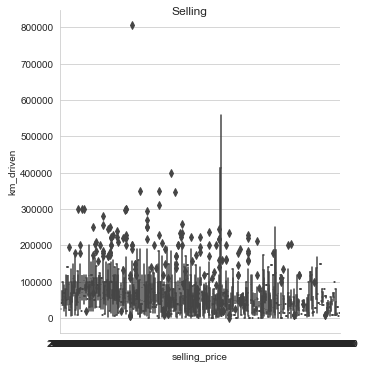

In [37]:
g = sns.catplot(x="selling_price", y = "km_driven" , data =df,kind="box")

g.fig.suptitle("Selling")

plt.show()

The above plot concludes that majority of the sales were of cars having selling price less tha 3,00,000 .

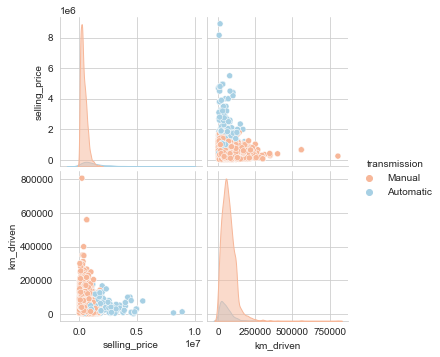

In [42]:
sns.pairplot(data=df,vars=["selling_price","km_driven"] , kind='scatter',hue='transmission',palette='RdBu',diag_kws={'alpha':.5})
plt.show()

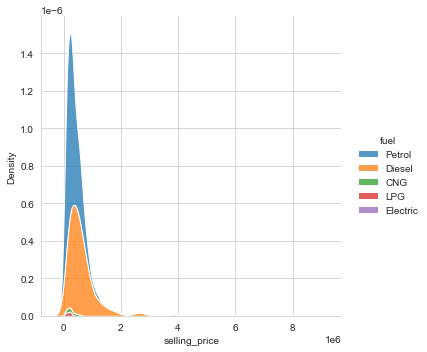

In [46]:
sns.displot(df, x="selling_price", hue="fuel", kind="kde", multiple="stack")

## Correlation 
The above density plot shows the  distribution of selling price in correlation with fuel type of cars .
Petrol fuel type shows the highest density of more than 1.4 then diesel at 0.6 and CNG and others showed less than 0.2 density .

## Histograms 


In [4]:
px.histogram( df , x= 'name' , color ='name')

In [39]:
px.histogram (df , x= 'name' , color= 'seller_type')


The about histograms simply shows the count of different car names present in the data and second histogram shows it in relation with seller type .

In [56]:
px.box(df , y  = 'name', color='seller_type')

## Another approach 
The above box plot shows the same thing as the second histogram but it was used to make the visualization more clear and interactive .

In [57]:
year_2016 =df[df.year == 2016 ]
# Drop any observations with null values.
df = df.dropna()

# Look at the data.
year_2016.head(15)

name  year  selling_price  km_driven  \
6             Hyundai Xcent 1.2 Kappa S  2016         550000      25000   
19            Hyundai Xcent 1.2 Kappa S  2016         550000      25000   
38            Toyota Corolla Altis G AT  2016         900000      50000   
58                Maruti Swift ZDi BSIV  2016         665000      46000   
86                 Honda Amaze S i-VTEC  2016         495000      11958   
116            Hyundai Creta 1.4 CRDi S  2016         780000      60000   
118  Hyundai Verna 1.6 VTVT AT S Option  2016         690000      80000   
128              Maruti Ertiga SHVS VDI  2016         800000      70000   
129           Hyundai Creta 1.6 CRDi SX  2016         840000      70000   
130               Honda Amaze S i-Vtech  2016         490000      50000   
142              Tata Bolt Quadrajet XE  2016         250000     120000   
148           Hyundai i20 Asta 1.4 CRDi  2016         430000      80000   
156                    Renault KWID RXT  2016         225000      25000   
168                   Chevrolet Beat LT  2016         320000      40000   
179               Hyundai i20 Magna 1.2  2016         600000      25000   

       fuel seller_type transmission         owner  
6    Petrol  Individual       Manual   First Owner  
19   Petrol  Individual       Manual   First Owner  
38   Petrol  Individual    Automatic   First Owner  
58   Diesel      Dealer       Manual   First Owner  
86   Petrol      Dealer       Manual   First Owner  
116  Diesel  Individual       Manual   First Owner  
118  Petrol  Individual    Automatic   First Owner  
128  Diesel  Individual       Manual  Second Owner  
129  Diesel  Individual       Manual  Second Owner  
130  Petrol  Individual       Manual   First Owner  
142  Diesel  Individual       Manual   First Owner  
148  Diesel  Individual       Manual   First Owner  
156  Petrol  Individual       Manual   First Owner  
168  Petrol  Individual       Manual   First Owner  
179  Petrol  Individual       Manual   First Owner

## 2016 year 
The above result shows all the model made in 2016 that were recorded in the data with all of their information .
and below it is highlighted in the lineplot .

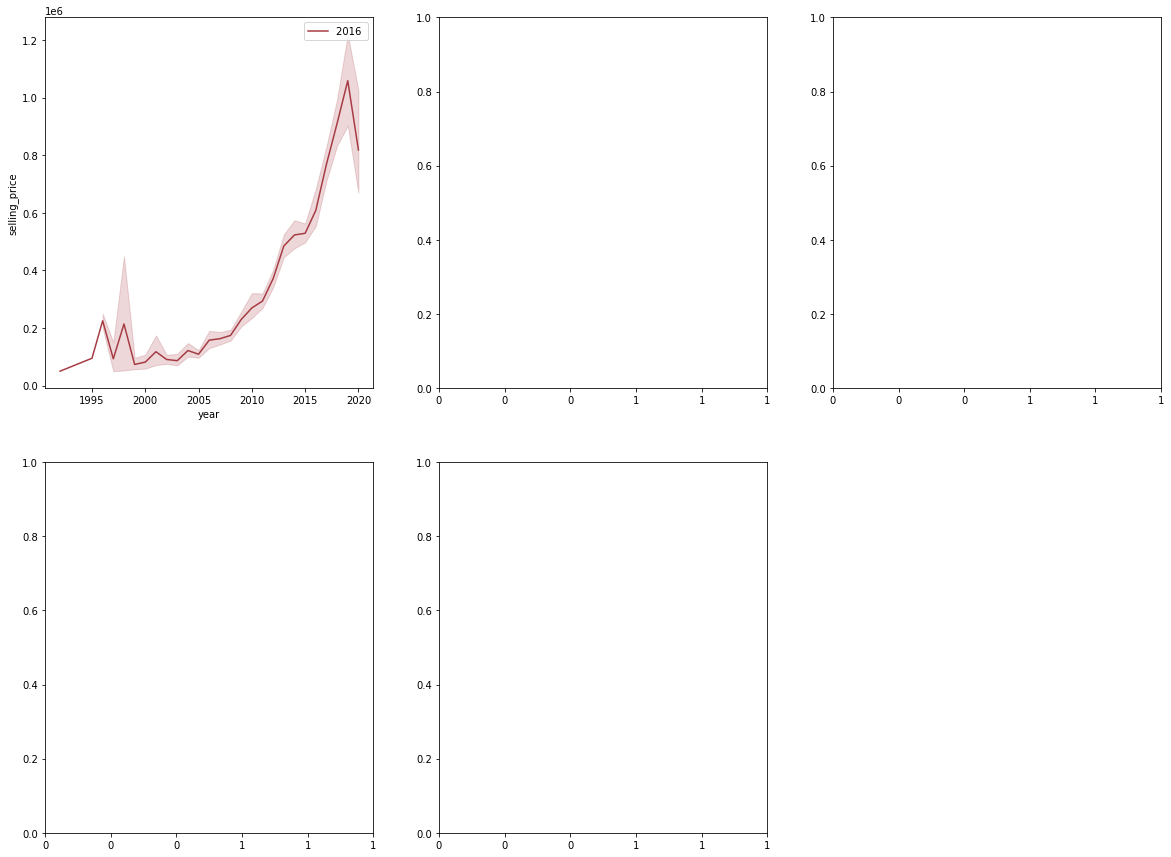

In [17]:
#plot sales
fig, axes = plt.subplots(2, 3,  figsize=(20, 15))
axes[1,2].set_visible(False)
sns.lineplot(data = df, x = 'year',y = 'selling_price', ax = axes[0,0], color =  '#A63B43', label = '2016 ')

#set format x-axis
from matplotlib.ticker import FormatStrFormatter
for c in axes:
   for ax in c:
      ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.show()


## Summary :
